#Import Libraries 
- numpy
- pandas

## Store in File


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/content/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#YOLO v5 
Cloning Repository


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git #clone repo
%cd yolov5


Cloning into 'yolov5'...
remote: Enumerating objects: 15637, done.
remote: Counting objects: 100% (244/244), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 15637 (delta 123), reused 173 (delta 101), pack-reused 15393
Receiving objects: 100% (15637/15637), 14.65 MiB | 16.89 MiB/s, done.
Resolving deltas: 100% (10647/10647), done.
/content/yolov5


In [ ]:
!pip install -r requirements.txt #install dependencies

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.0 MB/s eta 0:00:00


In [ ]:
# to check if i am in yolo folder or not
!pwd

/content/yolov5


In [ ]:
# importing custom dataset from roboflow
!mkdir /content/yolov5/data
%cd data

mkdir: cannot create directory ‘/content/yolov5/data’: File exists
/content/yolov5/data


In [ ]:
# importing custom dataset from roboflow
!curl -L "https://app.roboflow.com/ds/S6dYUmQJTV?key=FCjvBnGf8l" > Num_plate.zip 
!unzip Num_plate.zip
!rm Num_plate.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   2755      0 --:--:-- --:--:-- --:--:--  2755
100 19.5M  100 19.5M    0     0  6994k      0  0:00:02  0:00:02 --:--:-- 14.6M
Archive:  Num_plate.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/car_100_jpg.rf.9e96bc233ba807bbbe444ca1efa09b09.jpg  
 extracting: test/images/car_116_jpg.rf.ae8eed4a6034e295af2c4c52b6b61900.jpg  
 extracting: test/images/car_189_jpg.rf.409b2aa5f94044a16d7327015081c329.jpg  
 extracting: test/images/car_200_jpg.rf.db9e304cc2311aeac47874f72f4de42c.jpg  
 extracting: test/images/car_217_jpg.rf.aecfe93b5702fa0dddb2e9b2e465ea0a.jpg  
 extracting: test/images/car_249_jpg.rf.48a728e80531f5f7d319c7a2db14b757.jpg  
 extracting: test/images/ca

In [ ]:
!pwd

/content/yolov5/data


In [ ]:
!ls

Argoverse.yaml	  GlobalWheat2020.yaml	README.dataset.txt   train
coco128-seg.yaml  hyps			README.roboflow.txt  valid
coco128.yaml	  ImageNet.yaml		scripts		     VisDrone.yaml
coco.yaml	  images		SKU-110K.yaml	     VOC.yaml
data.yaml	  Objects365.yaml	test		     xView.yaml


In [ ]:
# Create configuration
import yaml
config = {'path': '/content/yolov5/data',
         'train': '/content/yolov5/data/train/images',
         'val': '/content/yolov5/data/valid/images',
         'test': '/content/yolov5/data/test/images',
         
          'nc': 1,
         'names': ['license_plate'],
         }
 
with open("data.yaml", "w") as file:
    yaml.dump(config, file, default_flow_style=True)

In [ ]:
# check data configuration file after setting up the images path 
!cat data.yaml

{names: [license_plate], nc: 1, path: /content/yolov5/data, test: /content/yolov5/data/test/images,
  train: /content/yolov5/data/train/images, val: /content/yolov5/data/valid/images}


In [ ]:
# back to yolo main directory 
%cd ..

/content/yolov5


In [ ]:
!python /content/yolov5/train.py --img 640 --batch 16 --epochs 40 --data /content/yolov5/data/data.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=40, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, ob

In [ ]:
!ls

In [ ]:
%cd runs/train/exp

In [ ]:
!ls

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(20,20))
f1_img = plt.imread('F1_curve.png')
plt.imshow(f1_img)

In [ ]:
plt.figure(figsize=(20,20))
PR_img = plt.imread('PR_curve.png')
plt.imshow(PR_img)

In [ ]:
plt.figure(figsize=(10,10))
cfm_img = plt.imread('confusion_matrix.png')
plt.imshow(cfm_img)

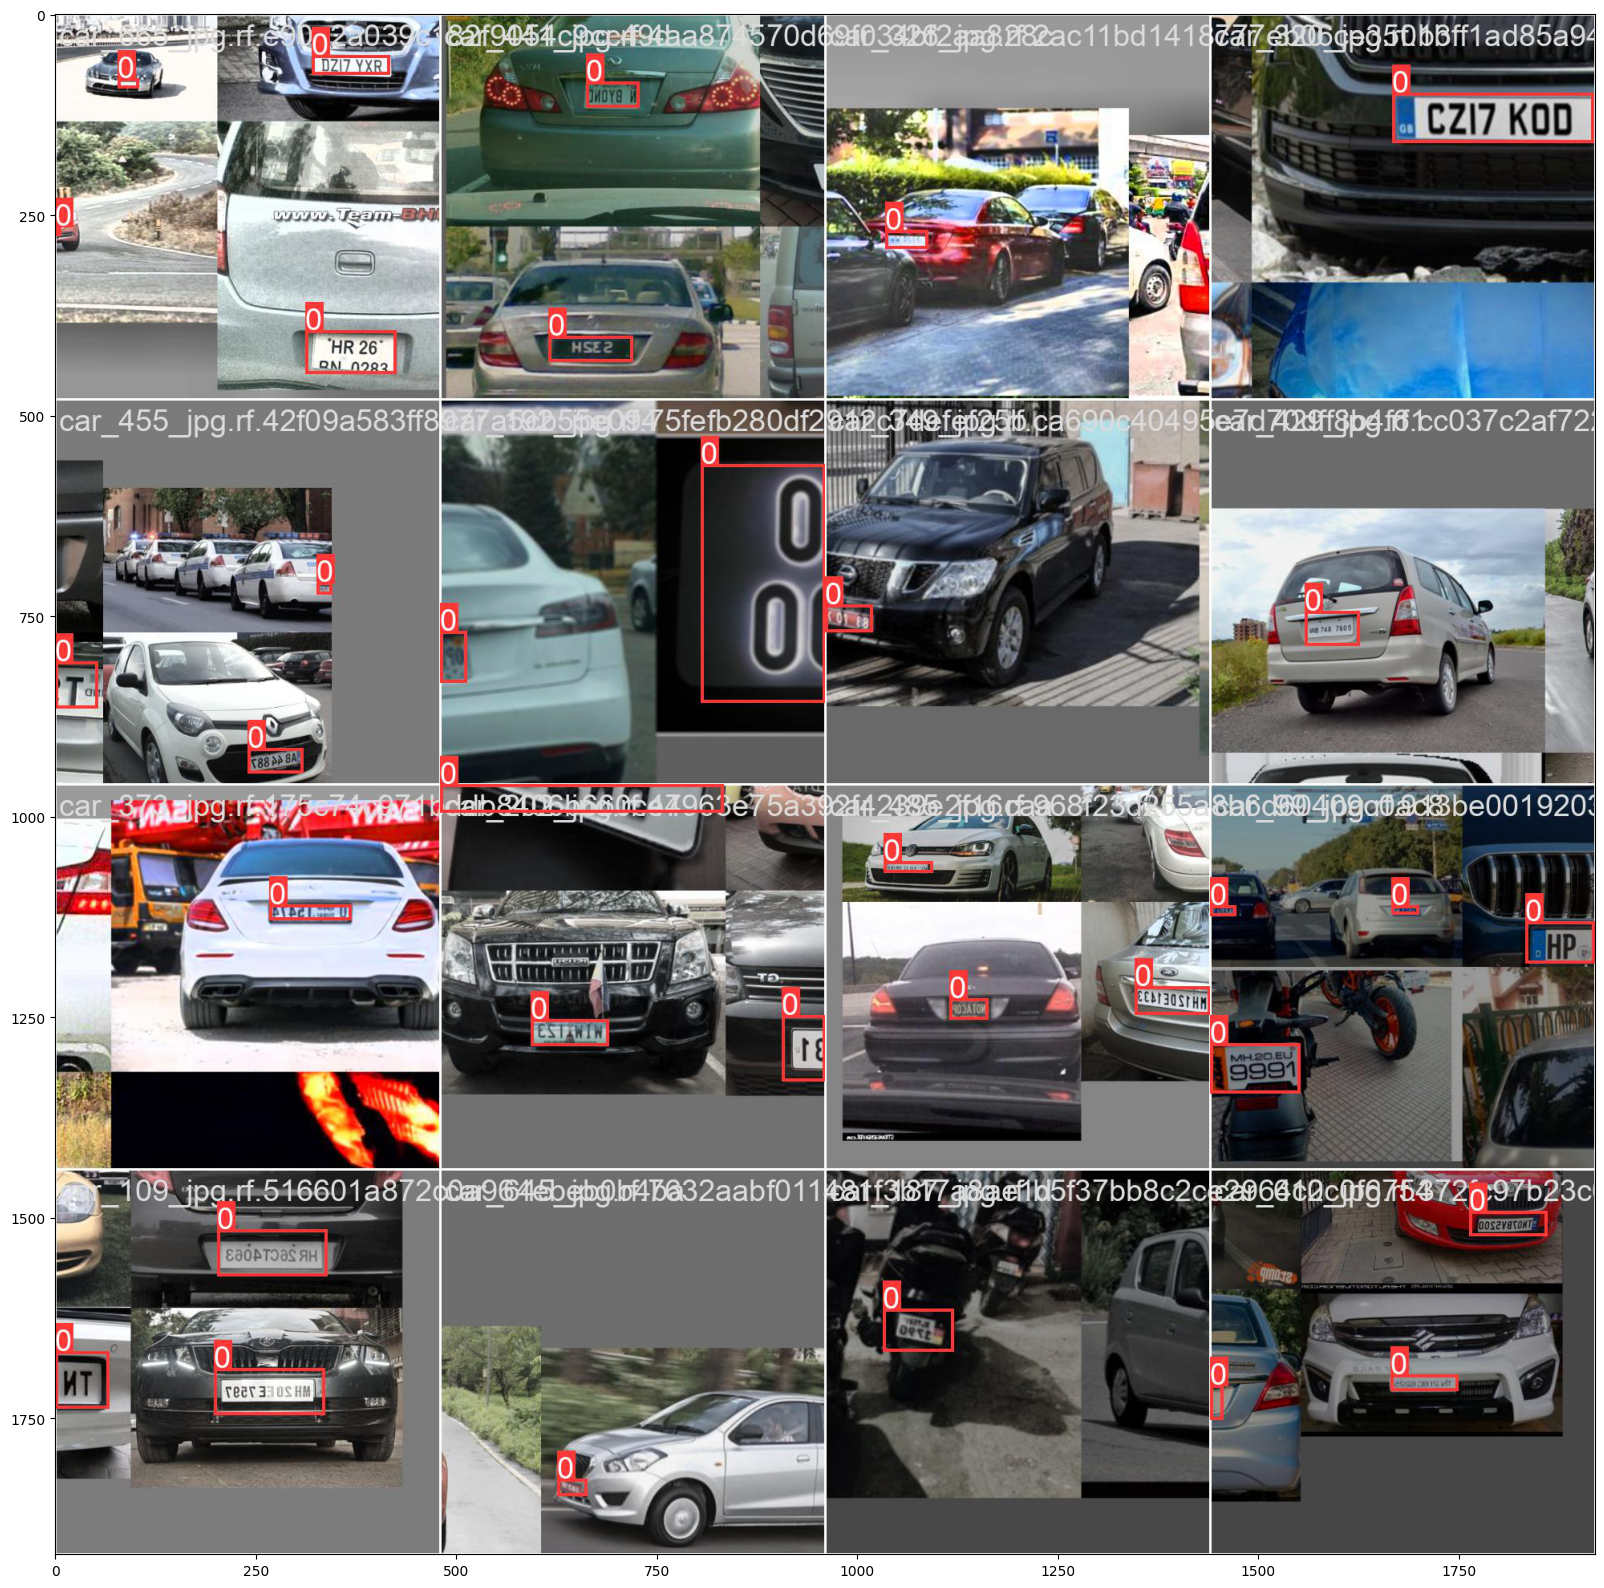

In [ ]:
plt.figure(figsize=(20,20))
trnb_img = plt.imread('train_batch1.jpg')
plt.imshow(trnb_img)

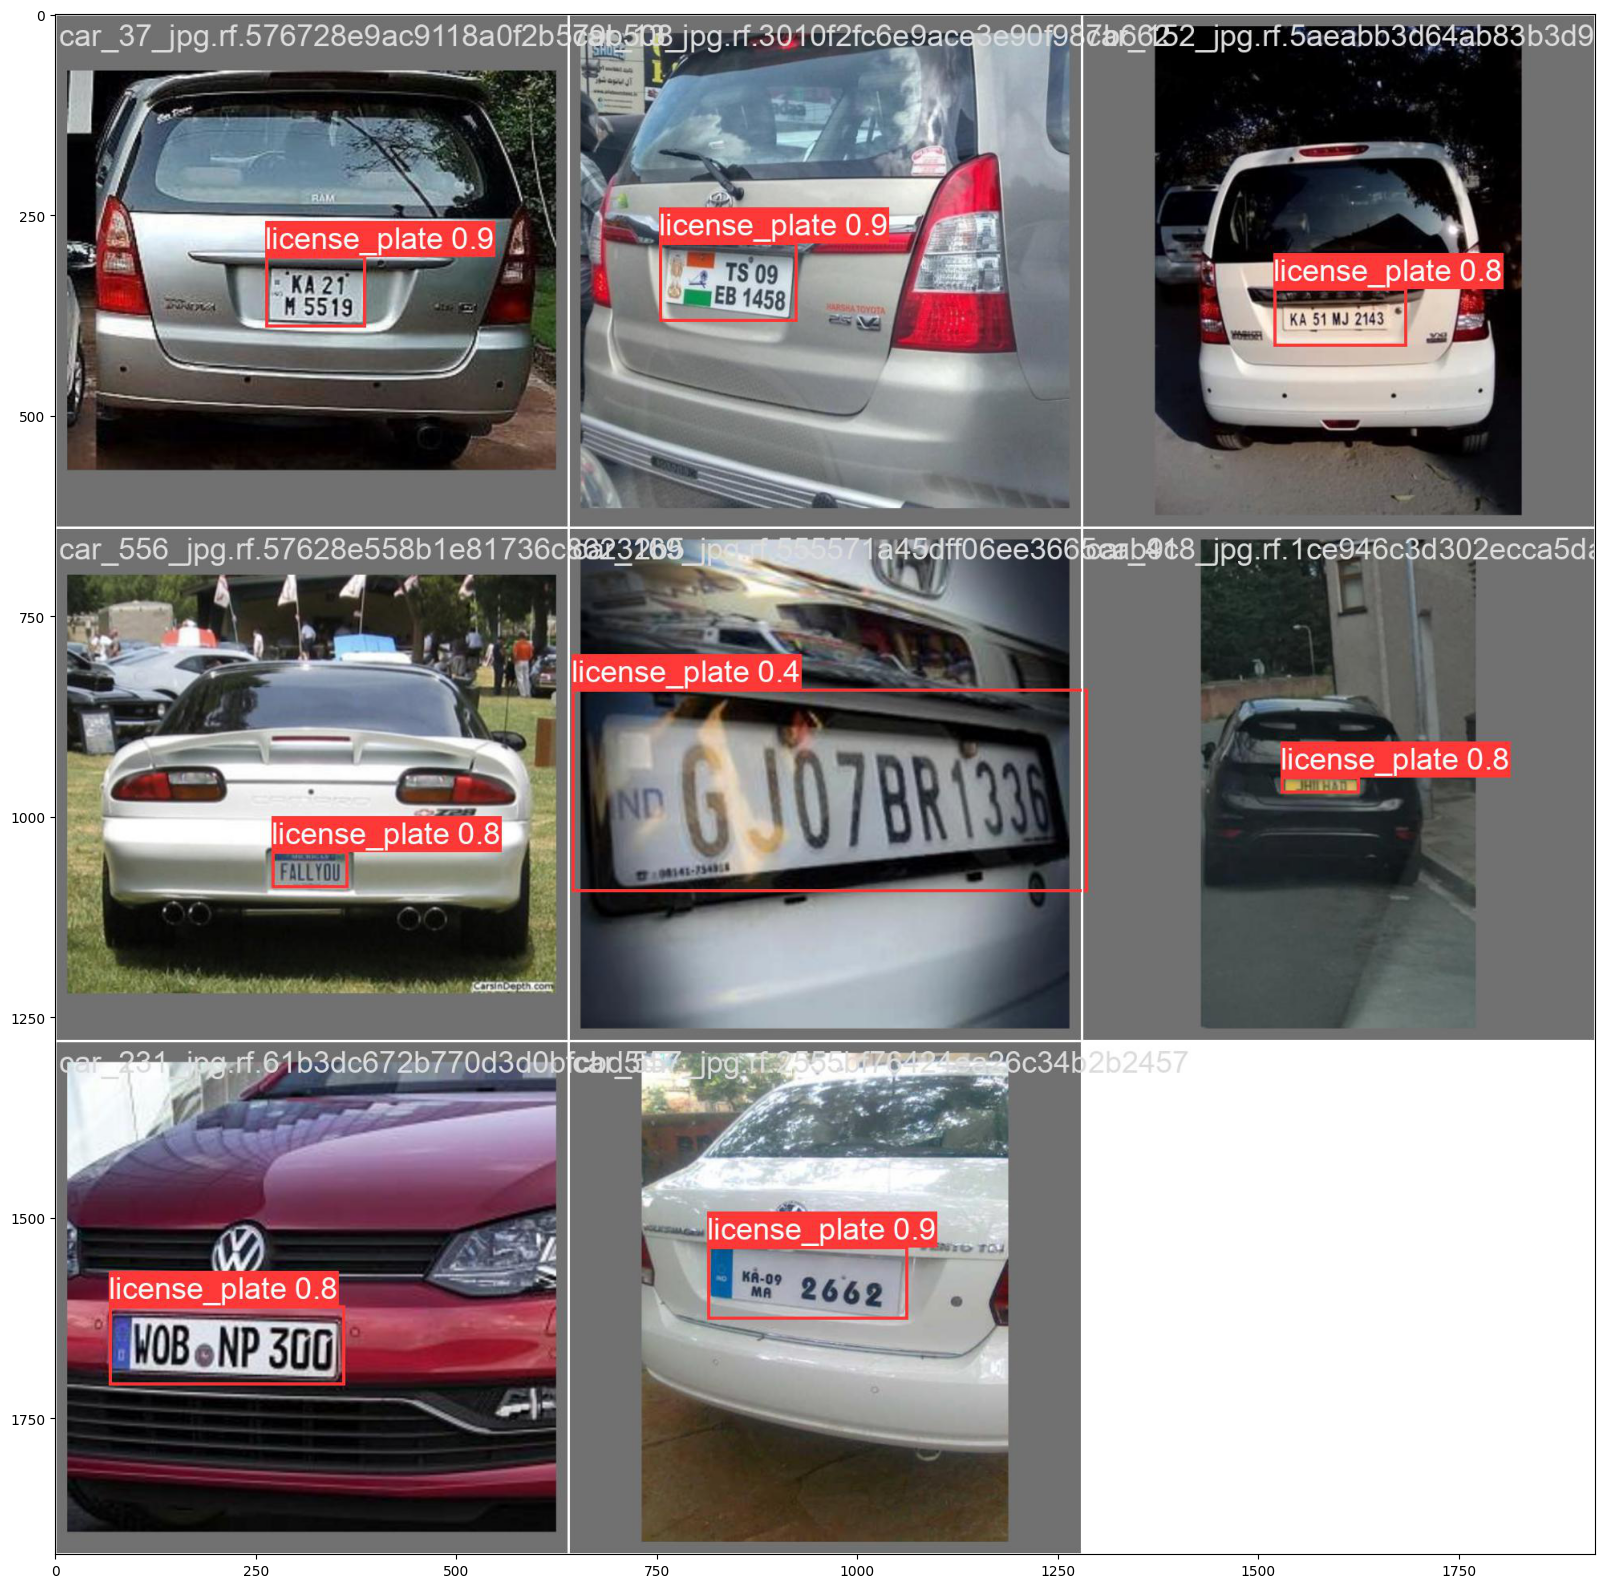

In [ ]:
plt.figure(figsize=(20,20))
valb_img = plt.imread('val_batch1_pred.jpg')
plt.imshow(valb_img)

In [ ]:
# just removing unnecessary folder to avoid confusion while uploading to Git Hub 
!rm -r /content/working/yolov5/segment
!rm -r /content/working/yolov5/classify

rm: cannot remove '/content/working/yolov5/segment': No such file or directory
rm: cannot remove '/content/working/yolov5/classify': No such file or directory


In [ ]:
#!cat data.yaml
#!rm -fr models
#curl -L "https://app.roboflow.com/ds/S6dYUmQJTV?key=FCjvBnGf8l" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
!git --version

git version 2.25.1
